Este é o código fonte para os resultados do artigo **Predição do resultado de jogos do Campeonato Brasileiro de Futebol com algorítmos de Aprendizagem de Máquina**. A base de dados utilizada contém informações de todos os jogos do Campeonato brasileiro desde os anos de 2000 até 2019. Esta base está presente no folder 'dataset' e também no seguinte repositório do github, de onde foi extraída originalmente: [campeonato-brasileiro-full.csv](https://github.com/adaoduque/Brasileirao_Dataset/blob/master/campeonato-brasileiro-full.csv)

In [ ]:
# importing libraries
import numpy as np
import pandas as pd

## Limpeza dos Dados

In [ ]:
# importando a base de dados original
jogos = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/campeonato-brasileiro-full.xlsx')

In [ ]:
# verificando a dimensionalidade da base de dados original
jogos.shape

(7939, 13)

In [ ]:
# visualizando samples da base de dados
jogos.head()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2.0,0.0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0.0,2.0,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4.0,1.0,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0.0,0.0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1.0,1.0,RS,RJ,Empate


Modificando o nome de algumas features para que possamos ficar em um contexto mais amigável

In [ ]:
#renomeando features
jogos = jogos.rename(columns={'Data':'Temporada','Clube 1': 'Mandante', 'Clube 2': 'Visitante', 'Vencedor': 'Resultado',
                     'Clube 1 Gols': 'Gols_Mandante', 'Clube 2 Gols': 'Gols_Visitante'} )
jogos.head()

,Horário,Dia,Temporada,Mandante,Visitante,Resultado,Rodada,Arena,Gols_Mandante,Gols_Visitante,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2.0,0.0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0.0,2.0,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4.0,1.0,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0.0,0.0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1.0,1.0,RS,RJ,Empate


Exclindo features categóricas que julgo inúteis aos modelos posteriores e que não servem para insights de transformações de dados

In [ ]:
# excluindo features 
jogos = jogos.drop(labels=['Horário', 'Dia', 'Estado Clube Vencedor', 'Arena'], axis=1)
jogos.head()

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Clube 1 Estado,Clube 2 Estado
0,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,2.0,0.0,RJ,BA
1,2000-07-29,Vasco,Sport,Sport,1ª Rodada,0.0,2.0,RJ,PE
2,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,4.0,1.0,ES,SP
3,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,0.0,0.0,RJ,MG
4,2000-07-30,Juventude,Flamengo,-,1ª Rodada,1.0,1.0,RS,RJ


É importante que para as futuras predições, o target esteja como valores inteiros. Para isso, é verificado que o objetivo do projeto encontra-se em prever a categoria correta do campo 'Resultado'. Assim, atribuo os seguintes valores aos resultados:
* Time Mandante vence = 1
* Time Visitante vence = 2
* Empate = 0

In [ ]:
# atribuindo os valores [0,1,2] aos respectivos resultados
regras_resultado = [(jogos['Gols_Mandante'] > jogos['Gols_Visitante']),
               (jogos['Gols_Mandante'] == jogos['Gols_Visitante']),
               (jogos['Gols_Mandante'] < jogos['Gols_Visitante'])]

valores_resultado = [1, 0, 2]

jogos['Resultado'] = np.select(regras_resultado, valores_resultado)
jogos.head()

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Clube 1 Estado,Clube 2 Estado
0,2000-07-29,Fluminense,Bahia,1,1ª Rodada,2.0,0.0,RJ,BA
1,2000-07-29,Vasco,Sport,2,1ª Rodada,0.0,2.0,RJ,PE
2,2000-07-29,Vitória,Palmeiras,1,1ª Rodada,4.0,1.0,ES,SP
3,2000-07-30,Botafogo-RJ,Atlético-MG,0,1ª Rodada,0.0,0.0,RJ,MG
4,2000-07-30,Juventude,Flamengo,0,1ª Rodada,1.0,1.0,RS,RJ


# Transformando os Dados

Nesta seção, procuro ter ideias para criar outras features baseadas nas informações que já tenho do dataset original. Com um conhecimento de prática esportiva, sei que a rivalidade entre times pode ser um fator decisivo em uma partida, portanto, se um jogo for um clássico ele tende a ser mais assirrado independente da situação dos times. 

No Brasil, Há muitos clássicos históricos entre times de diferentes regiões. Porém, pensando em rivalidade, considero clássicos apenas estaduais. Portanto, se os times que se enfrentarem pertencerem ao mesmo estado, o jogo é considerado um clássico.



In [ ]:
# Clássico Estadual
classico_estadual = [(jogos['Clube 1 Estado'] == jogos['Clube 2 Estado']),
                   (jogos['Clube 1 Estado'] != jogos['Clube 2 Estado'])]
valores_estadual = [1, 0]

jogos['Classico'] = np.select(classico_estadual, valores_estadual)

# descartando as variáveis do estado de cada time do dataset
jogos = jogos.drop(labels=['Clube 1 Estado', 'Clube 2 Estado'], axis=1)
jogos.head(30)


,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico
0,2000-07-29,Fluminense,Bahia,1,1ª Rodada,2.0,0.0,0
1,2000-07-29,Vasco,Sport,2,1ª Rodada,0.0,2.0,0
2,2000-07-29,Vitória,Palmeiras,1,1ª Rodada,4.0,1.0,0
3,2000-07-30,Botafogo-RJ,Atlético-MG,0,1ª Rodada,0.0,0.0,0
4,2000-07-30,Juventude,Flamengo,0,1ª Rodada,1.0,1.0,0
5,2000-07-30,Guarani,Santa-Cruz,0,1ª Rodada,0.0,0.0,0
6,2000-07-30,Cruzeiro,Athlético-PR,2,1ª Rodada,0.0,2.0,0
7,2000-07-30,América-MG,Gama,2,1ª Rodada,0.0,1.0,0
8,2000-07-30,Goiás,Corinthians,1,1ª Rodada,3.0,0.0,0
9,2000-08-02,Coritiba,Sport,0,2ª Rodada,0.0,0.0,0


In [ ]:
# visualizando os tipos de dados presentes no dataset
jogos.dtypes

Temporada         datetime64[ns]
Mandante                  object
Visitante                 object
Resultado                  int64
Rodada                    object
Gols_Mandante            float64
Gols_Visitante           float64
Classico                   int64
dtype: object

In [ ]:
# Corrigindo tipagem dos dados de temporada
jogos['Temporada'] = pd.to_datetime(jogos['Temporada'])
jogos.dtypes

Temporada         datetime64[ns]
Mandante                  object
Visitante                 object
Resultado                  int64
Rodada                    object
Gols_Mandante            float64
Gols_Visitante           float64
Classico                   int64
dtype: object

Muitos Padrões mudam a cada temporada, clubes perdem jogadores, compram jogadores, mudam de treinadores e dirigentes. Com certeza isso afeta muito o desempenho do time nas temporadas e é por isso que é difícil ter um time que vença uma competição por vários anos seguidos. Pensando nisso reduzo a base de dados para jogos apenas entre as temporadas de 2012 a 2019.

In [ ]:
# reduzindo base de dados para jogos das tempodas 2012 a 2019
jogos = jogos[jogos['Temporada'].dt.year >= 2012]
jogos.reset_index(drop=True, inplace = True)

jogos['Temporada'] = jogos['Temporada'].dt.year

jogos.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico
0,2012,Sport,Flamengo,0,1ª Rodada,1.0,1.0,0
1,2012,Palmeiras,Portuguesa,0,1ª Rodada,1.0,1.0,1
2,2012,Figueirense,Náutico,1,1ª Rodada,2.0,1.0,0
3,2012,Cruzeiro,Atlético-GO,0,1ª Rodada,0.0,0.0,0
4,2012,Bahia,Santos,0,1ª Rodada,0.0,0.0,0
5,2012,Ponte-Preta,Atlético-MG,2,1ª Rodada,0.0,1.0,0
6,2012,Botafogo-RJ,São-Paulo,1,1ª Rodada,4.0,2.0,0
7,2012,Corinthians,Fluminense,2,1ª Rodada,0.0,1.0,0
8,2012,Internacional,Coritiba,1,1ª Rodada,2.0,0.0,0
9,2012,Vasco,Grêmio,1,1ª Rodada,2.0,1.0,0


In [ ]:
# mudando o nome atribuído a cada rodada
jogos['Rodada'] = [int(x.split('ª')[0]) for x in jogos['Rodada'].values]
jogos.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico
0,2012,Sport,Flamengo,0,1,1.0,1.0,0
1,2012,Palmeiras,Portuguesa,0,1,1.0,1.0,1
2,2012,Figueirense,Náutico,1,1,2.0,1.0,0
3,2012,Cruzeiro,Atlético-GO,0,1,0.0,0.0,0
4,2012,Bahia,Santos,0,1,0.0,0.0,0


Baseado nas informações já presentes no dataset, é possível tirar informações para criar novas features. As primeiras features serão o número de vitórias, derrotas e empates de cada time na temporada atualizando a cada rodada, ou seja, todo o cálculo é baseado nas rodadas anteriores daquela temporada, o time chegará em uma rodada com os dados calculados das rodadas anteriores àquela.

EXEMPLO: na rodada 1 o Corinthans ganhou, na rodada 2 o Corinthians empatou, portanto, ele chega ao jogo da rodada 3 com (1 vitória, 1 empate e 0 derrotas) e assim sucessivamente

obs.: a primeira rodada da temporada sempre será zerada nesta feature

In [ ]:
# calculando número de vitórias, derrotas e empates na temporada
temporadas = jogos['Temporada'].value_counts().index.sort_values().values

jogos['Vitorias_Mandante'] = jogos['Mandante']
jogos['Vitorias_Visitante'] = jogos['Mandante']

jogos['Derrotas_Mandante'] = jogos['Mandante']
jogos['Derrotas_Visitante'] = jogos['Mandante']

jogos['Empates_Mandante'] = jogos['Mandante']
jogos['Empates_Visitante'] = jogos['Mandante']

for temporada in  temporadas:
    dft = jogos[jogos['Temporada'] == temporada]
    
    for index, row in dft.iterrows():
        df_mandante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Mandante'] == row['Mandante'])]
        c1_vitorias = 0
        c1_derrotas = 0
        c1_empates = 0
        for index2, row2 in df_mandante.iterrows():
            if row2['Resultado'] == 0:
                c1_empates+=1
            elif row2['Resultado'] == 1:
                c1_vitorias+=1
            elif row2['Resultado'] == 2:
                c1_derrotas+=1

        df_visitante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Visitante'] == row['Mandante'])]
        for index2, row2 in df_visitante.iterrows():
            if row2['Resultado'] == 1:
                c1_derrotas+=1
            elif row2['Resultado'] == 0:
                c1_empates+=1
            elif row2['Resultado'] == 2:
                c1_vitorias+=1


        df_mandante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Mandante'] == row['Visitante'])]
        c2_vitorias = 0
        c2_derrotas = 0
        c2_empates = 0
        for index2, row2 in df_mandante.iterrows():
            if row2['Resultado'] == 0:
                c2_empates+=1
            elif row2['Resultado'] == 1:
                c2_vitorias+=1
            elif row2['Resultado'] == 2:
                c2_derrotas+=1

        df_visitante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Visitante'] == row['Visitante'])]
        for index2, row2 in df_visitante.iterrows():
            if row2['Resultado'] == 1:
                c2_derrotas+=1
            elif row2['Resultado'] == 0:
                c2_empates+=1
            elif row2['Resultado'] == 2:
                c2_vitorias+=1


        jogos.at[index, 'Vitorias_Mandante'] = c1_vitorias
        jogos.at[index, 'Vitorias_Visitante'] = c2_vitorias
                    
        jogos.at[index, 'Derrotas_Mandante'] = c1_derrotas
        jogos.at[index, 'Derrotas_Visitante'] = c2_derrotas
                    
        jogos.at[index, 'Empates_Mandante'] = c1_empates
        jogos.at[index, 'Empates_Visitante'] = c2_empates

In [ ]:
jogos.tail()

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico,Vitorias_Mandante,Vitorias_Visitante,Derrotas_Mandante,Derrotas_Visitante,Empates_Mandante,Empates_Visitante
3035,2019,Goiás,Grêmio,1,38,3.0,2.0,0,14,19,16,10,7,8
3036,2019,Internacional,Atlético-MG,1,38,2.0,1.0,0,15,13,13,15,9,9
3037,2019,Cruzeiro,Palmeiras,2,38,0.0,2.0,0,7,20,15,6,15,11
3038,2019,Santos,Flamengo,1,38,4.0,0.0,0,21,28,8,3,8,6
3039,2019,CSA,São-Paulo,2,38,1.0,2.0,0,8,16,21,9,8,12


Outras features possíveis e mais detalhistas são o número de vitórias, derrotas e empate no mando de campo específico. Ou seja, quantos jogos o time ganhou na temporada quando jogou em casa? quando jogou fora? quantos empatou em casa? quantos empatou fora? quantos foi derrotado em casa? quantos foi derrotado fora?

Então calculamos o resultado destas perguntas, atualizando-lhes a cada rodada conforme feito anteriormente

In [ ]:
# calculando número de vitórias, empates e derrotas no mando de campo específico
def vitoria_em_casa(ser):
    wins = [0]
    
    [wins.append(wins[-1]+1) if win==1 else wins.append(wins[-1]) for win in ser.values]
    
    return wins[0:-1]

def vitoria_fora_de_casa(ser):
    wins = [0]
    
    [wins.append(wins[-1]+1) if win==2 else wins.append(wins[-1]) for win in ser.values]
    
    return wins[0:-1]

def empate(ser):
    wins = [0]
    
    [wins.append(wins[-1]+1) if win==0 else wins.append(wins[-1]) for win in ser.values]
    
    return wins[0:-1]

jogos['VC_Mandante'] = jogos.groupby(['Temporada', 'Mandante'])['Resultado'].transform(lambda x: vitoria_em_casa(x))
jogos['DC_Mandante'] = jogos.groupby(['Temporada', 'Mandante'])['Resultado'].transform(lambda x: vitoria_fora_de_casa(x))
jogos['VF_Visitante'] = jogos.groupby(['Temporada', 'Visitante'])['Resultado'].transform(lambda x: vitoria_fora_de_casa(x))
jogos['DF_Visitante'] = jogos.groupby(['Temporada', 'Visitante'])['Resultado'].transform(lambda x: vitoria_em_casa(x))
jogos['EC_Mandante'] = jogos.groupby(['Temporada', 'Mandante'])['Resultado'].transform(lambda x: empate(x)) 
jogos['EF_Visitante'] = jogos.groupby(['Temporada', 'Visitante'])['Resultado'].transform(lambda x: empate(x))

In [ ]:
jogos.tail(20)

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico,Vitorias_Mandante,Vitorias_Visitante,Derrotas_Mandante,Derrotas_Visitante,Empates_Mandante,Empates_Visitante,VC_Mandante,DC_Mandante,VF_Visitante,DF_Visitante,EC_Mandante,EF_Visitante
3020,2019,Fluminense,Fortaleza,0,37,0.0,0.0,0,11,14,16,15,9,7,6,6,4,9,6,5
3021,2019,Athlético-PR,Santos,1,37,1.0,0.0,0,17,21,10,7,9,8,11,4,8,6,3,4
3022,2019,Atlético-MG,Botafogo-rj,1,37,2.0,0.0,0,12,13,15,20,9,3,9,7,4,12,2,2
3023,2019,Chapecoense,CSA,1,37,3.0,0.0,0,6,8,20,20,10,8,3,10,2,13,5,3
3024,2019,Ceará,Corinthians,2,37,0.0,1.0,0,10,13,18,9,8,14,8,4,3,8,6,7
3025,2019,São-Paulo,Internacional,1,37,2.0,1.0,0,15,15,9,12,12,9,9,3,5,10,6,3
3026,2019,Bahia,Vasco,0,37,1.0,1.0,0,12,12,12,13,12,11,7,4,5,7,7,6
3027,2019,Flamengo,Avaí,1,37,6.0,1.0,0,27,3,3,23,6,10,16,0,2,14,2,2
3028,2019,Grêmio,Cruzeiro,1,37,2.0,0.0,0,18,7,10,14,8,15,11,4,2,9,3,7
3029,2019,Palmeiras,Goiás,1,37,5.0,1.0,0,19,14,6,15,11,7,12,2,4,10,4,4


Como temos o número de vitórias, empates e derrotas de um time na temporada. Podemos atualizar seus pontos a cada rodada, para isso segundo as regras do campeonato 
- vitória +3pts
- empate +1pt
- derrota +0pts

In [ ]:
# calculando pontuação dos times por rodada na temporada
temporadas = jogos['Temporada'].value_counts().index.sort_values().values

jogos['Pontos_Mandante'] = jogos['Mandante']
jogos['Pontos_Visitante'] = jogos['Mandante']

for temporada in  temporadas:
    dft = jogos[jogos['Temporada'] == temporada]
    
    for index, row in dft.iterrows():
        df_mandante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Mandante'] == row['Mandante'])]
        c1_pontos = 0
        for index2, row2 in df_mandante.iterrows():
            if row2['Resultado'] == 0:
                c1_pontos+=1
            elif row2['Resultado'] == 1:
                c1_pontos+=3
            elif row2['Resultado'] == 2:
                c1_pontos+=0

        df_visitante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Visitante'] == row['Mandante'])]
        for index2, row2 in df_visitante.iterrows():
            if row2['Resultado'] == 1:
                c1_pontos+=0
            elif row2['Resultado'] == 0:
                c1_pontos+=1
            elif row2['Resultado'] == 2:
                c1_pontos+=3


        df_mandante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Mandante'] == row['Visitante'])]
        c2_pontos = 0
        for index2, row2 in df_mandante.iterrows():
            if row2['Resultado'] == 0:
                c2_pontos+=1
            elif row2['Resultado'] == 1:
                c2_pontos+=3
            elif row2['Resultado'] == 2:
                c2_pontos+=0

        df_visitante = dft[(dft['Rodada'] < row['Rodada']) & (dft['Visitante'] == row['Visitante'])]
        for index2, row2 in df_visitante.iterrows():
            if row2['Resultado'] == 1:
                c2_pontos+=0
            elif row2['Resultado'] == 0:
                c2_pontos+=1
            elif row2['Resultado'] == 2:
                c2_pontos+=3


        jogos.at[index, 'Pontos_Mandante'] = c1_pontos
        jogos.at[index, 'Pontos_Visitante'] = c2_pontos
                    
        

In [ ]:
jogos.tail()

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico,Vitorias_Mandante,Vitorias_Visitante,...,Empates_Mandante,Empates_Visitante,VC_Mandante,DC_Mandante,VF_Visitante,DF_Visitante,EC_Mandante,EF_Visitante,Pontos_Mandante,Pontos_Visitante
3035,2019,Goiás,Grêmio,1,38,3.0,2.0,0,14,19,...,7,8,10,5,7,6,3,5,49,65
3036,2019,Internacional,Atlético-MG,1,38,2.0,1.0,0,15,13,...,9,9,10,2,3,8,6,7,54,48
3037,2019,Cruzeiro,Palmeiras,2,38,0.0,2.0,0,7,20,...,15,11,5,5,7,4,8,7,36,71
3038,2019,Santos,Flamengo,1,38,4.0,0.0,0,21,28,...,8,6,13,1,11,3,4,4,71,90
3039,2019,CSA,São-Paulo,2,38,1.0,2.0,0,8,16,...,8,12,6,7,6,6,5,6,32,60


Com as informações anteriores, é possível calcular o aproveitamento geral do time a cada rodada, dividindo o número de pontos que o time tem pelo número de pontos possíveis até a rodada jogada

In [ ]:
# calculando aproveitamento dos times por rodada na temporada
jogos['Pontos_Possiveis'] = jogos['Rodada'] * 3

jogos['Aprov_Mandante'] = jogos['Pontos_Mandante'] / jogos['Pontos_Possiveis']
jogos['Aprov_Visitante'] = jogos['Pontos_Visitante'] / jogos['Pontos_Possiveis']

# excluindo feature auxiliar apenas para cálculo
jogos = jogos.drop(labels=['Pontos_Possiveis'], axis=1)

jogos.tail()

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico,Vitorias_Mandante,Vitorias_Visitante,...,VC_Mandante,DC_Mandante,VF_Visitante,DF_Visitante,EC_Mandante,EF_Visitante,Pontos_Mandante,Pontos_Visitante,Aprov_Mandante,Aprov_Visitante
3035,2019,Goiás,Grêmio,1,38,3.0,2.0,0,14,19,...,10,5,7,6,3,5,49,65,0.429825,0.570175
3036,2019,Internacional,Atlético-MG,1,38,2.0,1.0,0,15,13,...,10,2,3,8,6,7,54,48,0.473684,0.421053
3037,2019,Cruzeiro,Palmeiras,2,38,0.0,2.0,0,7,20,...,5,5,7,4,8,7,36,71,0.315789,0.622807
3038,2019,Santos,Flamengo,1,38,4.0,0.0,0,21,28,...,13,1,11,3,4,4,71,90,0.622807,0.789474
3039,2019,CSA,São-Paulo,2,38,1.0,2.0,0,8,16,...,6,7,6,6,5,6,32,60,0.280702,0.526316


Outra feature que ao meu ver inicial seria muito importante é o confronto direto, por se tratar de dados históricos de um mesmo campeonato, podemos ter um time levando vantagem sobre o outro em confrontos das duas equipes ao longo das temporadas. 

In [ ]:
# calculando histórico de confrontos diretos entre duas equipes
jogos['Mandante_Venceu'] = 0
jogos['Visitante_Venceu'] = 0
jogos['Equipes_Empataram'] = 0

clubs = jogos['Mandante'].value_counts().index.sort_values().values

for club1 in clubs:
    for club2 in clubs:
        dfc = jogos[((jogos['Mandante'] == club1) & (jogos['Visitante'] == club2)) | ((jogos['Visitante'] == club1) & (jogos['Mandante'] == club2))]
        mandante_venceu = 0
        visitante_venceu = 0
        equipes_empataram = 0
        for index, row in dfc.iterrows():
            jogos.at[index, 'Mandante_Venceu'] = mandante_venceu
            jogos.at[index, 'Visitante_Venceu'] = visitante_venceu
            jogos.at[index, 'Equipes_Empataram'] = equipes_empataram
            
            if row['Resultado'] == 0:
                mandante_venceu +=1
            elif row['Resultado'] == 1:
                visitante_venceu +=1
            else:
                equipes_empataram+=1
            

In [ ]:
jogos.tail()

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico,Vitorias_Mandante,Vitorias_Visitante,...,DF_Visitante,EC_Mandante,EF_Visitante,Pontos_Mandante,Pontos_Visitante,Aprov_Mandante,Aprov_Visitante,Mandante_Venceu,Visitante_Venceu,Equipes_Empataram
3035,2019,Goiás,Grêmio,1,38,3.0,2.0,0,14,19,...,6,3,5,49,65,0.429825,0.570175,3,4,0
3036,2019,Internacional,Atlético-MG,1,38,2.0,1.0,0,15,13,...,8,6,7,54,48,0.473684,0.421053,1,8,4
3037,2019,Cruzeiro,Palmeiras,2,38,0.0,2.0,0,7,20,...,4,8,7,36,71,0.315789,0.622807,4,8,1
3038,2019,Santos,Flamengo,1,38,4.0,0.0,0,21,28,...,3,4,4,71,90,0.622807,0.789474,6,7,2
3039,2019,CSA,São-Paulo,2,38,1.0,2.0,0,8,16,...,6,5,6,32,60,0.280702,0.526316,1,0,0


Agora, calculo o saldo de gols para cada time no mando de campo específico, essa feature responde perguntas como: Quantos gols o time mandante fez jogando em casa na temporada? quantos sofreu?, quantos gols o time visitante fez fora de casa? quantos sofreu?

In [ ]:
def calcular_goals(ser):
    goals = [0]
    
    [goals.append(goals[-1]+goal) for goal in ser.values]
    
    return goals[0:-1]

jogos['SG_Casa_Mandante'] = jogos.groupby(['Temporada', 'Mandante'])['Gols_Mandante'].transform(lambda x: calcular_goals(x))
jogos['GS_Casa_Mandante'] = jogos.groupby(['Temporada', 'Mandante'])['Gols_Visitante'].transform(lambda x: calcular_goals(x))

jogos['SG_Fora_Visitante'] = jogos.groupby(['Temporada', 'Visitante'])['Gols_Visitante'].transform(lambda x: calcular_goals(x))
jogos['GS_Fora_Visitante'] = jogos.groupby(['Temporada', 'Visitante'])['Gols_Mandante'].transform(lambda x: calcular_goals(x))

In [ ]:
jogos.tail()

,Temporada,Mandante,Visitante,Resultado,Rodada,Gols_Mandante,Gols_Visitante,Classico,Vitorias_Mandante,Vitorias_Visitante,...,Pontos_Visitante,Aprov_Mandante,Aprov_Visitante,Mandante_Venceu,Visitante_Venceu,Equipes_Empataram,SG_Casa_Mandante,GS_Casa_Mandante,SG_Fora_Visitante,GS_Fora_Visitante
3035,2019,Goiás,Grêmio,1,38,3.0,2.0,0,14,19,...,65,0.429825,0.570175,3,4,0,28.0,21.0,24.0,18.0
3036,2019,Internacional,Atlético-MG,1,38,2.0,1.0,0,15,13,...,48,0.473684,0.421053,1,8,4,26.0,14.0,16.0,24.0
3037,2019,Cruzeiro,Palmeiras,2,38,0.0,2.0,0,7,20,...,71,0.315789,0.622807,4,8,1,13.0,15.0,19.0,19.0
3038,2019,Santos,Flamengo,1,38,4.0,0.0,0,21,28,...,90,0.622807,0.789474,6,7,2,40.0,15.0,30.0,15.0
3039,2019,CSA,São-Paulo,2,38,1.0,2.0,0,8,16,...,60,0.280702,0.526316,1,0,0,16.0,22.0,14.0,17.0


A seguir, excluo as features que informam quantos gols cada time fez na partida, pois, para a previsão não faz sentido já que assim já saberiamos o resultado do confronto.

In [ ]:
# excluindo feature de quantos gosl o time fez na partida
jogos = jogos.drop(labels=['Gols_Mandante', 'Gols_Visitante'], axis=1)

In [ ]:
# deixando o nome dos times em letras minúsculas para evitar Camel Case
jogos['Mandante'] = jogos['Mandante'].str.lower()
jogos['Visitante'] = jogos['Visitante'].str.lower()
jogos.head()

,Temporada,Mandante,Visitante,Resultado,Rodada,Classico,Vitorias_Mandante,Vitorias_Visitante,Derrotas_Mandante,Derrotas_Visitante,...,Pontos_Visitante,Aprov_Mandante,Aprov_Visitante,Mandante_Venceu,Visitante_Venceu,Equipes_Empataram,SG_Casa_Mandante,GS_Casa_Mandante,SG_Fora_Visitante,GS_Fora_Visitante
0,2012,sport,flamengo,0,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
1,2012,palmeiras,portuguesa,0,1,1,0,0,0,0,...,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
2,2012,figueirense,náutico,1,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
3,2012,cruzeiro,atlético-go,0,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
4,2012,bahia,santos,0,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0


In [ ]:
jogos.head(10)

,Temporada,Mandante,Visitante,Resultado,Rodada,Classico,Vitorias_Mandante,Vitorias_Visitante,Derrotas_Mandante,Derrotas_Visitante,...,Pontos_Visitante,Aprov_Mandante,Aprov_Visitante,Mandante_Venceu,Visitante_Venceu,Equipes_Empataram,SG_Casa_Mandante,GS_Casa_Mandante,SG_Fora_Visitante,GS_Fora_Visitante
0,2012,sport,flamengo,0,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
1,2012,palmeiras,portuguesa,0,1,1,0,0,0,0,...,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
2,2012,figueirense,náutico,1,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
3,2012,cruzeiro,atlético-go,0,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
4,2012,bahia,santos,0,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
5,2012,ponte-preta,atlético-mg,2,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
6,2012,botafogo-rj,são-paulo,1,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
7,2012,corinthians,fluminense,2,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
8,2012,internacional,coritiba,1,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0
9,2012,vasco,grêmio,1,1,0,0,0,0,0,...,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0


In [ ]:
jogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temporada           3040 non-null   int64  
 1   Mandante            3040 non-null   object 
 2   Visitante           3040 non-null   object 
 3   Resultado           3040 non-null   int64  
 4   Rodada              3040 non-null   int64  
 5   Classico            3040 non-null   int64  
 6   Vitorias_Mandante   3040 non-null   object 
 7   Vitorias_Visitante  3040 non-null   object 
 8   Derrotas_Mandante   3040 non-null   object 
 9   Derrotas_Visitante  3040 non-null   object 
 10  Empates_Mandante    3040 non-null   object 
 11  Empates_Visitante   3040 non-null   object 
 12  VC_Mandante         3040 non-null   int64  
 13  DC_Mandante         3040 non-null   int64  
 14  VF_Visitante        3040 non-null   int64  
 15  DF_Visitante        3040 non-null   int64  
 16  EC_Man

In [ ]:
jogos.shape

(3040, 29)

Sites de apostas tem o sistema de odds para os jogos. As odds são números baseados em cálculos estatísticos que apontam a probabilidade de um evento ocorrer. Quanto maior a probabilidade de umm evento ocorrer, menor a odd e vice versa. Aqui, vamos integrar ao projeto uma nova base de dados contendo as odds de cada jogo nesse período segundo a casa de apostas inglesa OddsPortal

É importante salientar que o dataset de odds é encontrada no folder deste projeto em datasets e no site de estatísticas esportivas europeu [football-data.co.uk](https://www.football-data.co.uk/brazil.php), as odds são cálculos estatísticos de probabilidade e indicam tendências do resultado dos jogos

In [ ]:
odds = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/BRA.xlsx')
odds.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012.0,2012-05-19,22:30:00,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012.0,2012-05-19,22:30:00,Sport,Flamengo,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012.0,2012-05-20,01:00:00,Figueirense,Náutico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012.0,2012-05-20,20:00:00,Botafogo-RJ,São-Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012.0,2012-05-20,20:00:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [ ]:
# tratando dados do dataset odds para ter somente as features que quero
odds = odds.drop(labels=['Country','League','Season','Time','HG','AG','Res','PH','PD','PA','AvgH','AvgD','AvgA'], axis=1)
odds = odds.rename(columns={'Date':'Temporada','Home': 'Mandante', 'Away': 'Visitante'})

odds['Mandante'] = odds['Mandante'].str.lower()
odds['Visitante'] = odds['Visitante'].str.lower()

odds.shape

(3800, 6)

In [ ]:
odds = odds.rename(columns={'MaxH':'odd_Mandante','MaxD':'odd_Empate', 'MaxA':'odd_Visitante'} )

In [ ]:
odds.dtypes

Temporada        datetime64[ns]
Mandante                 object
Visitante                object
odd_Mandante            float64
odd_Empate              float64
odd_Visitante           float64
dtype: object

In [ ]:
odds = odds[odds['Temporada'].dt.year  >= 2012]
odds = odds[odds['Temporada'].dt.year  <= 2019]
odds.reset_index(drop=True, inplace = True)

odds['Temporada'] = odds['Temporada'].dt.year
odds.tail()

,Temporada,Mandante,Visitante,odd_Mandante,odd_Empate,odd_Visitante
3035,2019,fortaleza,bahia,2.12,3.74,3.90
3036,2019,goiás,grêmio,2.10,3.75,3.87
3037,2019,internacional,atlético-mg,1.64,4.30,6.00
3038,2019,santos,flamengo,2.80,3.75,2.56
3039,2019,vasco,chapecoense,1.46,4.75,8.62


In [ ]:
odds.head(10)

,Temporada,Mandante,Visitante,odd_Mandante,odd_Empate,odd_Visitante
0,2012,palmeiras,portuguesa,1.76,3.87,5.31
1,2012,sport,flamengo,2.83,3.42,2.70
2,2012,figueirense,náutico,1.67,4.05,7.22
3,2012,botafogo-rj,são-paulo,2.49,3.39,3.15
4,2012,corinthians,fluminense,1.96,3.53,4.41
5,2012,internacional,coritiba,1.77,3.90,6.00
6,2012,ponte-preta,atlético-mg,3.12,3.45,2.62
7,2012,bahia,santos,2.45,3.52,3.32
8,2012,cruzeiro,atlético-go,1.85,3.79,4.82
9,2012,vasco,grêmio,2.25,3.46,3.64


In [ ]:
odds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temporada      3040 non-null   int64  
 1   Mandante       3040 non-null   object 
 2   Visitante      3040 non-null   object 
 3   odd_Mandante   3040 non-null   float64
 4   odd_Empate     3040 non-null   float64
 5   odd_Visitante  3040 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 142.6+ KB


In [ ]:
jogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temporada           3040 non-null   int64  
 1   Mandante            3040 non-null   object 
 2   Visitante           3040 non-null   object 
 3   Resultado           3040 non-null   int64  
 4   Rodada              3040 non-null   int64  
 5   Classico            3040 non-null   int64  
 6   Vitorias_Mandante   3040 non-null   object 
 7   Vitorias_Visitante  3040 non-null   object 
 8   Derrotas_Mandante   3040 non-null   object 
 9   Derrotas_Visitante  3040 non-null   object 
 10  Empates_Mandante    3040 non-null   object 
 11  Empates_Visitante   3040 non-null   object 
 12  VC_Mandante         3040 non-null   int64  
 13  DC_Mandante         3040 non-null   int64  
 14  VF_Visitante        3040 non-null   int64  
 15  DF_Visitante        3040 non-null   int64  
 16  EC_Man

In [ ]:
jogos['ID'] = jogos['Mandante'] + jogos['Visitante']
jogos.head(10)

,Temporada,Mandante,Visitante,Resultado,Rodada,Classico,Vitorias_Mandante,Vitorias_Visitante,Derrotas_Mandante,Derrotas_Visitante,...,Aprov_Mandante,Aprov_Visitante,Mandante_Venceu,Visitante_Venceu,Equipes_Empataram,SG_Casa_Mandante,GS_Casa_Mandante,SG_Fora_Visitante,GS_Fora_Visitante,ID
0,2012,sport,flamengo,0,1,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,sportflamengo
1,2012,palmeiras,portuguesa,0,1,1,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,palmeirasportuguesa
2,2012,figueirense,náutico,1,1,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,figueirensenáutico
3,2012,cruzeiro,atlético-go,0,1,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,cruzeiroatlético-go
4,2012,bahia,santos,0,1,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,bahiasantos
5,2012,ponte-preta,atlético-mg,2,1,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,ponte-pretaatlético-mg
6,2012,botafogo-rj,são-paulo,1,1,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,botafogo-rjsão-paulo
7,2012,corinthians,fluminense,2,1,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,corinthiansfluminense
8,2012,internacional,coritiba,1,1,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,internacionalcoritiba
9,2012,vasco,grêmio,1,1,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,vascogrêmio


In [ ]:
odds['ID'] = odds['Mandante'] + odds['Visitante']
odds.head()

,Temporada,Mandante,Visitante,odd_Mandante,odd_Empate,odd_Visitante,ID
0,2012,palmeiras,portuguesa,1.76,3.87,5.31,palmeirasportuguesa
1,2012,sport,flamengo,2.83,3.42,2.70,sportflamengo
2,2012,figueirense,náutico,1.67,4.05,7.22,figueirensenáutico
3,2012,botafogo-rj,são-paulo,2.49,3.39,3.15,botafogo-rjsão-paulo
4,2012,corinthians,fluminense,1.96,3.53,4.41,corinthiansfluminense


In [ ]:
data = pd.merge(jogos, odds, on=['ID','Temporada'])

In [ ]:
data.head()

,Temporada,Mandante_x,Visitante_x,Resultado,Rodada,Classico,Vitorias_Mandante,Vitorias_Visitante,Derrotas_Mandante,Derrotas_Visitante,...,SG_Casa_Mandante,GS_Casa_Mandante,SG_Fora_Visitante,GS_Fora_Visitante,ID,Mandante_y,Visitante_y,odd_Mandante,odd_Empate,odd_Visitante
0,2012,sport,flamengo,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,sportflamengo,sport,flamengo,2.83,3.42,2.70
1,2012,palmeiras,portuguesa,0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,palmeirasportuguesa,palmeiras,portuguesa,1.76,3.87,5.31
2,2012,figueirense,náutico,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,figueirensenáutico,figueirense,náutico,1.67,4.05,7.22
3,2012,cruzeiro,atlético-go,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,cruzeiroatlético-go,cruzeiro,atlético-go,1.85,3.79,4.82
4,2012,bahia,santos,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,bahiasantos,bahia,santos,2.45,3.52,3.32


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 0 to 3039
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temporada           3040 non-null   int64  
 1   Mandante_x          3040 non-null   object 
 2   Visitante_x         3040 non-null   object 
 3   Resultado           3040 non-null   int64  
 4   Rodada              3040 non-null   int64  
 5   Classico            3040 non-null   int64  
 6   Vitorias_Mandante   3040 non-null   object 
 7   Vitorias_Visitante  3040 non-null   object 
 8   Derrotas_Mandante   3040 non-null   object 
 9   Derrotas_Visitante  3040 non-null   object 
 10  Empates_Mandante    3040 non-null   object 
 11  Empates_Visitante   3040 non-null   object 
 12  VC_Mandante         3040 non-null   int64  
 13  DC_Mandante         3040 non-null   int64  
 14  VF_Visitante        3040 non-null   int64  
 15  DF_Visitante        3040 non-null   int64  
 16  EC_Man

In [ ]:
pd.isna(data).sum()

Temporada             0
Mandante_x            0
Visitante_x           0
Resultado             0
Rodada                0
Classico              0
Vitorias_Mandante     0
Vitorias_Visitante    0
Derrotas_Mandante     0
Derrotas_Visitante    0
Empates_Mandante      0
Empates_Visitante     0
VC_Mandante           0
DC_Mandante           0
VF_Visitante          0
DF_Visitante          0
EC_Mandante           0
EF_Visitante          0
Pontos_Mandante       0
Pontos_Visitante      0
Aprov_Mandante        0
Aprov_Visitante       0
Mandante_Venceu       0
Visitante_Venceu      0
Equipes_Empataram     0
SG_Casa_Mandante      0
GS_Casa_Mandante      0
SG_Fora_Visitante     0
GS_Fora_Visitante     0
ID                    0
Mandante_y            0
Visitante_y           0
odd_Mandante          0
odd_Empate            0
odd_Visitante         0
dtype: int64

In [ ]:
data.columns

Index(['Temporada', 'Mandante_x', 'Visitante_x', 'Resultado', 'Rodada',
       'Classico', 'Vitorias_Mandante', 'Vitorias_Visitante',
       'Derrotas_Mandante', 'Derrotas_Visitante', 'Empates_Mandante',
       'Empates_Visitante', 'VC_Mandante', 'DC_Mandante', 'VF_Visitante',
       'DF_Visitante', 'EC_Mandante', 'EF_Visitante', 'Pontos_Mandante',
       'Pontos_Visitante', 'Aprov_Mandante', 'Aprov_Visitante',
       'Mandante_Venceu', 'Visitante_Venceu', 'Equipes_Empataram',
       'SG_Casa_Mandante', 'GS_Casa_Mandante', 'SG_Fora_Visitante',
       'GS_Fora_Visitante', 'ID', 'Mandante_y', 'Visitante_y', 'odd_Mandante',
       'odd_Empate', 'odd_Visitante'],
      dtype='object')

In [ ]:
data = data.drop(labels=['Temporada', 'ID', 'Mandante_y', 'Visitante_y'], axis=1)

In [ ]:
salvar = pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/basededados.xlsx')
data.to_excel(salvar, 'dados', index=False)
salvar.save()

In [ ]:
data = data.drop(labels=['Mandante_x', 'Visitante_x'], axis=1)

In [ ]:
# corrigindo tipagem dos dados
data['Vitorias_Mandante'].astype(str).astype(int)
data['Vitorias_Visitante'].astype(str).astype(int)
data['Derrotas_Mandante'].astype(str).astype(int)
data['Derrotas_Visitante'].astype(str).astype(int)
data['Empates_Mandante'].astype(str).astype(int)
data['Empates_Visitante'].astype(str).astype(int)
data['Pontos_Mandante'].astype(str).astype(int)
data['Pontos_Visitante'].astype(str).astype(int)
data['Aprov_Mandante'].astype(str).astype(float)
data['Aprov_Visitante'].astype(str).astype(float)

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3035    0.570175
3036    0.421053
3037    0.622807
3038    0.789474
3039    0.526316
Name: Aprov_Visitante, Length: 3040, dtype: float64

In [ ]:
# separando base de dados em features e target
Y = data['Resultado']
X = data.drop('Resultado', axis=1)

In [ ]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/data.pkl', mode='wb') as f:
  pickle.dump(jogos, f)

In [ ]:
# salvando dados pré-processados
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/jogos_BR.pkl', mode='wb') as f:
  pickle.dump([X,Y], f)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 0 to 3039
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Resultado           3040 non-null   int64  
 1   Rodada              3040 non-null   int64  
 2   Classico            3040 non-null   int64  
 3   Vitorias_Mandante   3040 non-null   object 
 4   Vitorias_Visitante  3040 non-null   object 
 5   Derrotas_Mandante   3040 non-null   object 
 6   Derrotas_Visitante  3040 non-null   object 
 7   Empates_Mandante    3040 non-null   object 
 8   Empates_Visitante   3040 non-null   object 
 9   VC_Mandante         3040 non-null   int64  
 10  DC_Mandante         3040 non-null   int64  
 11  VF_Visitante        3040 non-null   int64  
 12  DF_Visitante        3040 non-null   int64  
 13  EC_Mandante         3040 non-null   int64  
 14  EF_Visitante        3040 non-null   int64  
 15  Pontos_Mandante     3040 non-null   object 
 16  Pontos

In [ ]:
X.shape

(3040, 28)

# Análise de Dados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/jogos_BR.pkl', 'rb') as f:
  [X,Y] = pickle.load(f)

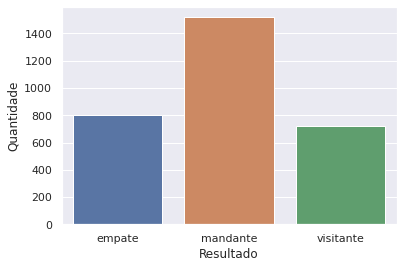

In [ ]:
# análisando quantidade de vitórias, derrotas e empate
result = ['empate', 'mandante','visitante']
sns.set_theme(style="darkgrid")
sns.countplot(x = data['Resultado'])
plt.xlabel('Resultado')
plt.ylabel('Quantidade')
plt.xticks(range(len(result)), result)
plt.show()


os times que jogam em casa tendem a ganhar seus jogos e os times que jogam fora de casa não. Contudo, isso gera um problema de desbalanceamento dos dados no dataset, o que pode deixar o sistema tendencioso. A solução é utilizar-se de  técnica de oversampling de dados minoritários

In [ ]:
#calculando percentual
c, e, d = data['Resultado'].value_counts()
total = c+e+d
print(f'time mandante venceu: {c/total*100:.2f}% dos jogos ({c})')
print(f'times empataram: {e/total*100:.2f}% dos jogos ({e})')
print(f'time visitante venceu: {d/total*100:.2f}% dos jogos ({d})')

time mandante venceu: 49.97% dos jogos (1519)
times empataram: 26.41% dos jogos (803)
time visitante venceu: 23.62% dos jogos (718)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# salvando dados de treinamento e teste
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/train_test_BR.pkl', mode='wb') as f:
  pickle.dump([X_train, X_test, y_train, y_test], f)

# OVERSAMPLING MODELS

Class=0, n=1221 (33.333%)
Class=1, n=1221 (33.333%)
Class=2, n=1221 (33.333%)


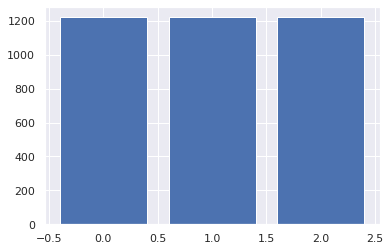

In [ ]:
# example of oversampling a multi-class classification dataset

from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot


# transform the dataset
oversample = SMOTE()
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train_over)
for k,v in counter.items():
	per = v / len(y_train_over) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
# salvando dados de treinamento e teste sobreamostrados
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/train_test_over_BR.pkl', mode='wb') as f:
  pickle.dump([X_train_over, y_train_over], f)

# GRID SEARCH

In [ ]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/train_test_over_BR.pkl', 'rb') as f:
  [X_train_over, y_train_over] = pickle.load(f)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

# Escolhendo parâmetros para a checkagem do random forest
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [100],
              'min_samples_split': [2, 3, 5, 7, 9],
              'min_samples_leaf': [1, 3, 5, 7]
              }

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)

# verificação
grid_search.fit(X_train_over, y_train_over)
melhores_param = grid_search.best_params_
melhor_result = grid_search.best_score_

# resultados
print('Random Forest\n------------------------')
print(melhores_param)
print(melhor_result)
print('------------------------')

parametros = {'n_neighbors': [3, 5, 7, 11, 15, 21, 25, 27, 31],
              'p': [1, 2],
              'weights': ['uniform', 'distance'],
              }

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_train_over, y_train_over)
melhores_param = grid_search.best_params_
melhor_result = grid_search.best_score_

print('KNN\n------------------------')
print(melhores_param)
print(melhor_result)
print('------------------------')

parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [0.1, 1 , 1.5, 2],
              'penalty': ['l1', 'l2', 'elasticnet']
              }

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_train_over, y_train_over)
melhores_param = grid_search.best_params_
melhor_result = grid_search.best_score_

print('Logistic Regression\n------------------------')
print(melhores_param)
print(melhor_result)
print('------------------------')

parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [0.1, 1 , 1.5, 2],
              'kernel': ['rbf', 'poly', 'sigmoid'],
              }

grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_train_over, y_train_over)
melhores_param = grid_search.best_params_
melhor_result = grid_search.best_score_

print('SVM\n------------------------')
print(melhores_param)
print(melhor_result)
print('------------------------')


parametros = {'activation': ['logistic', 'relu', 'tanh'],
              'solver': ['adam','sgd'],
              'batch_size': [10, 50, 100]
              }

grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=30000000000000, tol=0.00001), param_grid=parametros)
grid_search.fit(X_train_over, y_train_over)
melhores_param = grid_search.best_params_
melhor_result = grid_search.best_score_

print('MLP\n------------------------')
print(melhores_param)
print(melhor_result)
print('------------------------')


Random Forest
------------------------
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
0.7019476065871968
------------------------
KNN
------------------------
{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.7005654582187134
------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression
------------------------
{'C': 1, 'penalty': 'l2', 'tol': 0.001}
0.4488236083465658
------------------------
SVM
------------------------
{'C': 2, 'kernel': 'rbf', 'tol': 0.001}
0.5299223193851155
------------------------
MLP
------------------------
{'activation': 'logistic', 'batch_size': 100, 'solver': 'adam'}
0.6749077449511328
------------------------


>SVM 0.538 (0.023)
>LR 0.444 (0.024)
>KNN 0.699 (0.021)
>RF 0.704 (0.026)
>Naive 0.421 (0.025)
>MLP 0.658 (0.060)


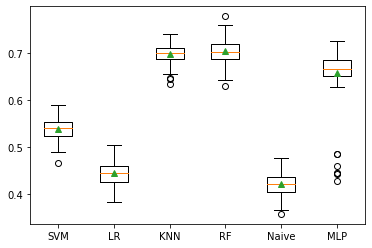

In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
 
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define models to test
def get_models():
	models, names = list(), list()
	# SVM
	models.append(SVC(C= 2, kernel= 'rbf', tol= 0.001))
	names.append('SVM')
 
 # LR
	models.append(LogisticRegression(C= 1.5, penalty= 'l2', tol= 0.001))
	names.append('LR')
 
	# KNN
	models.append(KNeighborsClassifier(n_neighbors= 3, p= 1, weights= 'distance'))
	names.append('KNN')

	# RF
	models.append(RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, class_weight='balanced'))
	names.append('RF')

  # Naive
	models.append(GaussianNB())
	names.append('Naive')
 
  # MLP
	models.append(MLPClassifier(activation= 'logistic', batch_size= 100, solver= 'adam', max_iter=30000000000000, tol=0.00001))
	names.append('MLP')

	return models, names
 

# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
	# evaluate the model and store results
	scores = evaluate_model(X_train_over, y_train_over, models[i])
	results.append(scores)
	# summarize performance
	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
# define models to test

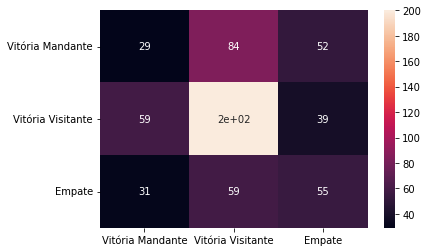

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
RF = RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, class_weight='balanced')

import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/train_test_BR.pkl', 'rb') as f:
  [X_train, X_test, y_train, y_test] = pickle.load(f)

import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/train_test_over_BR.pkl', 'rb') as f:
  [X_train_over, y_train_over] = pickle.load(f)

RF.fit(X_train_over, y_train_over)

y_pred = RF.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=['Vitória Mandante', 'Vitória Visitante', 'Empate'],
                    columns=['Vitória Mandante', 'Vitória Visitante', 'Empate'])

sns.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
print('Test score: {:.3f}'.format(RF.score(X_test, y_test)))

Test score: 0.467


In [ ]:
X_test = pd.DataFrame(X_test)

In [ ]:
X_test.shape

(608, 28)

In [ ]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Soccer Prediction/dataset/data.pkl', 'rb') as f:
  data = pickle.load(f)

In [ ]:
data.head()

,Temporada,Mandante,Visitante,Resultado,Rodada,Classico,Vitorias_Mandante,Vitorias_Visitante,Derrotas_Mandante,Derrotas_Visitante,...,Aprov_Mandante,Aprov_Visitante,Mandante_Venceu,Visitante_Venceu,Equipes_Empataram,SG_Casa_Mandante,GS_Casa_Mandante,SG_Fora_Visitante,GS_Fora_Visitante,ID
0,2012,sport,flamengo,0,1,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,sportflamengo
1,2012,palmeiras,portuguesa,0,1,1,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,palmeirasportuguesa
2,2012,figueirense,náutico,1,1,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,figueirensenáutico
3,2012,cruzeiro,atlético-go,0,1,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,cruzeiroatlético-go
4,2012,bahia,santos,0,1,0,0,0,0,0,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,bahiasantos


In [ ]:
proba_df = pd.DataFrame(RF.predict_proba(X_test))
df_r = data.loc[X_test.index, ['Mandante', 'Visitante', 'Rodada', 'Temporada', 'Resultado']].reset_index(drop=True)

df_rp = df_r.merge(proba_df, left_index=True, right_index=True)
df_rp.rename(columns={'0': 'empate', '1':'mandante','2':'visitante'}, inplace = True)
df_rp.head(10)

,Mandante,Visitante,Rodada,Temporada,Resultado,0,1,2
0,sport,flamengo,1,2012,0,0.49,0.36,0.15
1,palmeiras,portuguesa,1,2012,0,0.37,0.34,0.29
2,figueirense,náutico,1,2012,1,0.20,0.55,0.25
3,cruzeiro,atlético-go,1,2012,0,0.41,0.37,0.22
4,bahia,santos,1,2012,0,0.32,0.18,0.50
5,ponte-preta,atlético-mg,1,2012,2,0.29,0.24,0.47
6,botafogo-rj,são-paulo,1,2012,1,0.34,0.33,0.33
7,corinthians,fluminense,1,2012,2,0.40,0.37,0.23
8,internacional,coritiba,1,2012,1,0.33,0.49,0.18
9,vasco,grêmio,1,2012,1,0.31,0.55,0.14


In [ ]:
df_rp[df_rp['Rodada']==20]

,Mandante,Visitante,Rodada,Temporada,Resultado,0,1,2
189,fluminense,corinthians,20,2012,0,0.23,0.34,0.43
190,atlético-mg,ponte-preta,20,2012,0,0.19,0.17,0.64
191,santos,bahia,20,2012,2,0.26,0.63,0.11
192,coritiba,internacional,20,2012,1,0.21,0.06,0.73
193,atlético-go,cruzeiro,20,2012,2,0.30,0.50,0.20
194,grêmio,vasco,20,2012,1,0.10,0.04,0.86
195,náutico,figueirense,20,2012,1,0.36,0.02,0.62
196,portuguesa,palmeiras,20,2012,1,0.23,0.44,0.33
197,flamengo,sport,20,2012,0,0.33,0.44,0.23
198,são-paulo,botafogo-rj,20,2012,1,0.30,0.17,0.53
